In [181]:
from datagen import SemCorDataSet
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

plt.rcParams.update({'font.size': 16})

In [182]:
import pathlib

def stat_output_path(statname: str, dataset_name: str, ext: str = "png") -> pathlib.Path:
    path = pathlib.Path("graphics") / f"{statname}-{dataset_name}.{ext}"
    path.parent.mkdir(parents=True, exist_ok=True)

    return path

In [183]:

# all = SemCorDataSet.unpickle('dataset/train.pkl')
semcor = SemCorDataSet.unpickle('dataset/semcor4roberta.pickle')
se2007 = SemCorDataSet.unpickle('dataset/semeval2007-roberta.pickle')
se2013 = SemCorDataSet.unpickle('dataset/semeval2013-roberta.pickle')
se2015 = SemCorDataSet.unpickle('dataset/semeval2015-roberta.pickle')
sn2 = SemCorDataSet.unpickle('dataset/senseval2-roberta.pickle')
sn3 = SemCorDataSet.unpickle('dataset/senseval3-roberta.pickle')

names = ["SemCor", "SemEval2007", "SemEval2013", "SemEval2015", "SensEval2", "SensEval3"]
dses = [semcor, se2007, se2013, se2015, sn2, sn3]
#omsti = SemCorDataSet(all.df[semcor.df.shape[0]:])

## Train Dataset Analysis

In [184]:
def print_alinged(key, value, sep = None):
    if sep is not None:
        value = sep.join(map(str, value))
    print(f"{key} = {value}")

In [185]:
def num_tokens(dataset):
    return dataset.token_level.shape[0]

for name, ds in zip(names, dses):
    print_alinged(f"- {name} token count", num_tokens(ds))
#print_alinged("Total token count", num_tokens(all))
#print_alinged("- SemCor token count", num_tokens(semcor))
#print_alinged("- OMSTI token count", num_tokens(omsti))

- SemCor token count = 802443
- SemEval2007 token count = 3201
- SemEval2013 token count = 8391
- SemEval2015 token count = 2604
- SensEval2 token count = 5766
- SensEval3 token count = 5541


In [186]:
def num_sense_tokens(dataset):
    df = dataset.token_level
    sense_tokesn = df[df["sense-keys"].notnull()]
    return sense_tokesn.shape[0], df["sense-keys"].shape[0]

def num_sentences(dataset):
    df = dataset.sentence_level
    return df.shape[0]

def num_unique_sense_tokens(dataset):
    df = dataset.token_level
    sense_tokesn = df["sense-keys"][df["sense-keys"].notnull()].unique()
    return sense_tokesn.shape[0]

#print_alinged("Total tokens with sense count", num_sense_tokens(all))
for name, ds in zip(names, dses):
    print_alinged(f"- {name} tokens with sense count", num_sense_tokens(ds), sep=" / ")
#print_alinged("- OMSTI tokens with sense count", num_sense_tokens(omsti))

for name, ds in zip(names, dses):
    print_alinged(f"- {name} unique sense count", num_unique_sense_tokens(ds))

for name, ds in zip(names, dses):
    print_alinged(f"- {name} sentence count", num_sentences(ds))    

- SemCor tokens with sense count = 121220 / 802443
- SemEval2007 tokens with sense count = 259 / 3201
- SemEval2013 tokens with sense count = 645 / 8391
- SemEval2015 tokens with sense count = 528 / 2604
- SensEval2 tokens with sense count = 1069 / 5766
- SensEval3 tokens with sense count = 948 / 5541
- SemCor unique sense count = 2584
- SemEval2007 unique sense count = 198
- SemEval2013 unique sense count = 267
- SemEval2015 unique sense count = 245
- SensEval2 unique sense count = 563
- SensEval3 unique sense count = 511
- SemCor sentence count = 37176
- SemEval2007 sentence count = 135
- SemEval2013 sentence count = 306
- SemEval2015 sentence count = 138
- SensEval2 sentence count = 242
- SensEval3 sentence count = 352


In [187]:
def num_sentences(dataset):
    return len(dataset.sentences().groups)

#print_alinged("Total sentence count", num_sentences(all))
for name, ds in zip(names, dses):
    print_alinged(f"- {name} sentence count", num_sentences(ds))
#print_alinged("- OMSTI sentence count", num_sentences(omsti))

- SemCor sentence count = 37176
- SemEval2007 sentence count = 135
- SemEval2013 sentence count = 306
- SemEval2015 sentence count = 138
- SensEval2 sentence count = 242
- SensEval3 sentence count = 352


### Per-Sentence statistics

In [188]:
def sentences_token_stat(dataset, name):
    sentence_counts = dataset.sentences().count()
    print(sentence_counts[['token', 'sense-keys']].describe())
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7.5))
    sentence_counts.hist(column=["token"], ax=axes[0], sharey=True, bins=50, legend=True, range=(0, 100))
    axes[0].set_title(f"Tokens per sentence\n{name}")
    sentence_counts.hist(column=["sense-keys"], ax=axes[1], sharey=True, bins=50, legend=True, range=(0, 100), color="orange")
    axes[1].set_title(f"Sense annotations per sentence\n{name}")

    op = stat_output_path(statname="sentences_token_stat", dataset_name=name)
    fig.savefig(op)
    


#### SemCor

              token    sense-keys
count  37176.000000  37176.000000
mean      21.584974      3.260706
std       13.685187      3.224933
min        1.000000      0.000000
25%       12.000000      1.000000
50%       19.000000      2.000000
75%       28.000000      5.000000
max      258.000000     60.000000


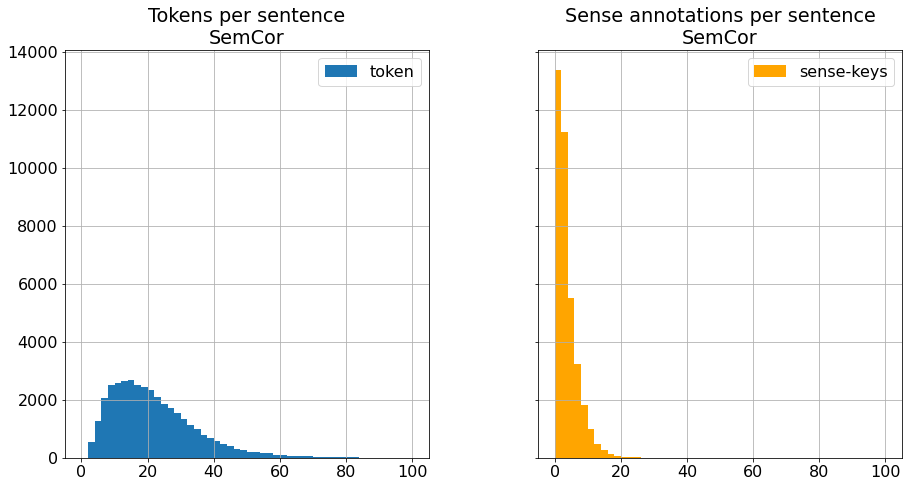

In [189]:
sentences_token_stat(semcor, "SemCor")

            token  sense-keys
count  135.000000  135.000000
mean    23.711111    1.918519
std     13.896132    1.753682
min      3.000000    0.000000
25%     14.000000    1.000000
50%     21.000000    2.000000
75%     31.500000    3.000000
max     81.000000    8.000000


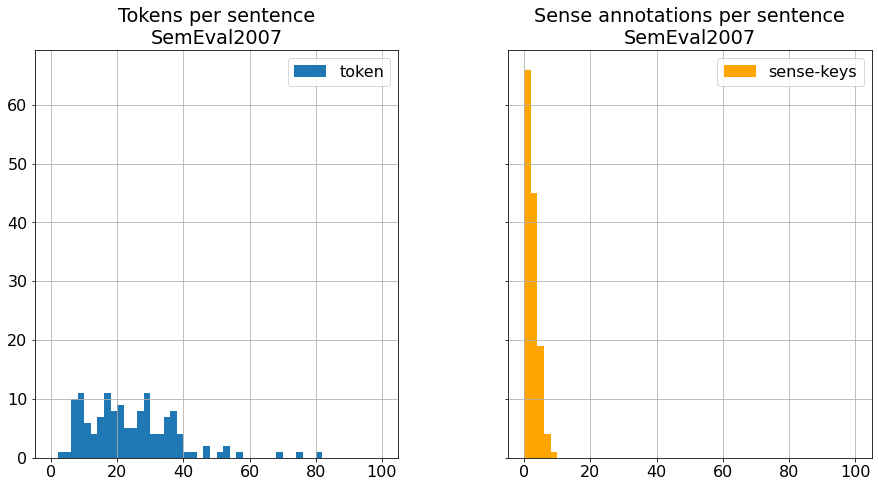

In [190]:
sentences_token_stat(se2007, "SemEval2007")

            token  sense-keys
count  306.000000  306.000000
mean    27.421569    2.107843
std     14.627463    1.703844
min      2.000000    0.000000
25%     16.000000    1.000000
50%     25.000000    2.000000
75%     37.000000    3.000000
max     79.000000    9.000000


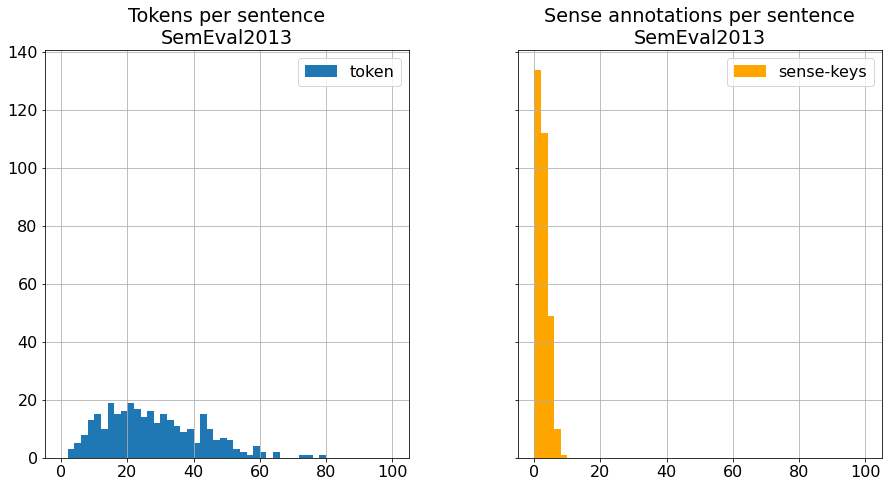

In [191]:
sentences_token_stat(se2013, "SemEval2013")

            token  sense-keys
count  138.000000  138.000000
mean    18.869565    3.826087
std     11.505521    3.039672
min      3.000000    0.000000
25%     10.000000    1.000000
50%     17.000000    3.000000
75%     26.000000    6.000000
max     70.000000   14.000000


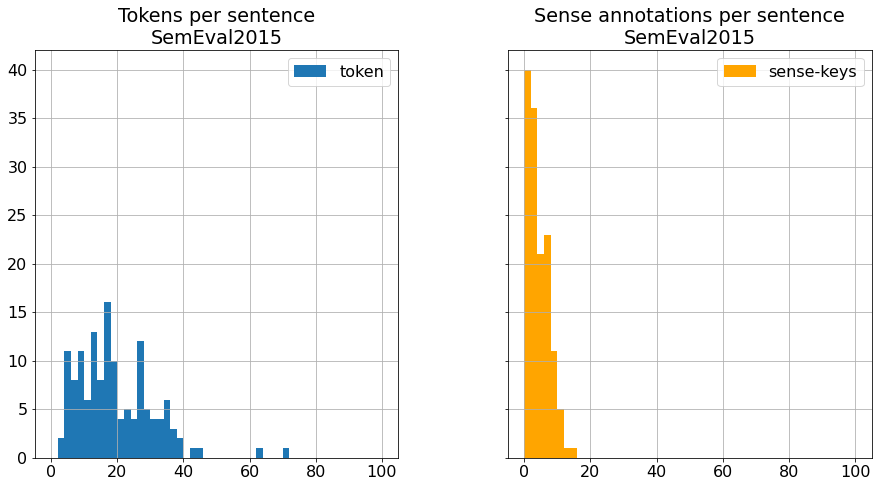

In [192]:
sentences_token_stat(se2015, "SemEval2015")

            token  sense-keys
count  242.000000  242.000000
mean    23.826446    4.417355
std     10.589416    2.662828
min      4.000000    0.000000
25%     16.000000    3.000000
50%     24.000000    4.000000
75%     30.750000    6.000000
max     63.000000   15.000000


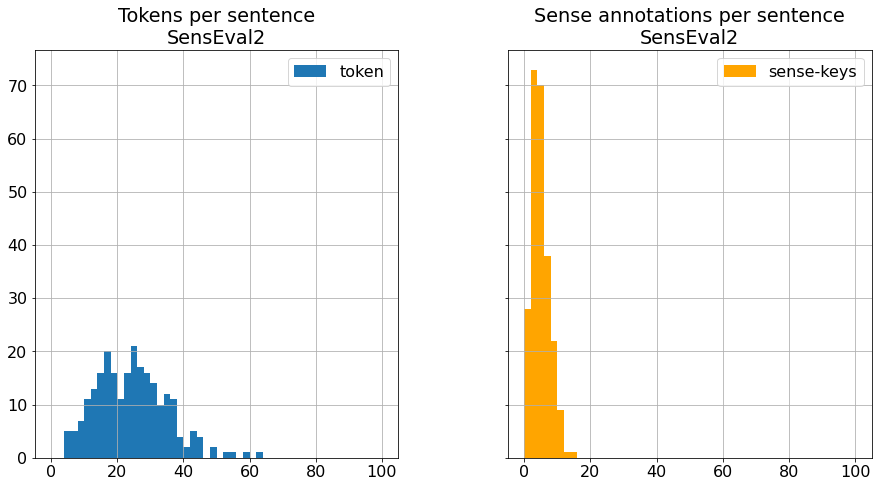

In [193]:
sentences_token_stat(sn2, "SensEval2")

            token  sense-keys
count  352.000000  352.000000
mean    15.741477    2.693182
std     12.118535    2.850933
min      2.000000    0.000000
25%      7.000000    1.000000
50%     13.000000    2.000000
75%     21.000000    4.000000
max     68.000000   19.000000


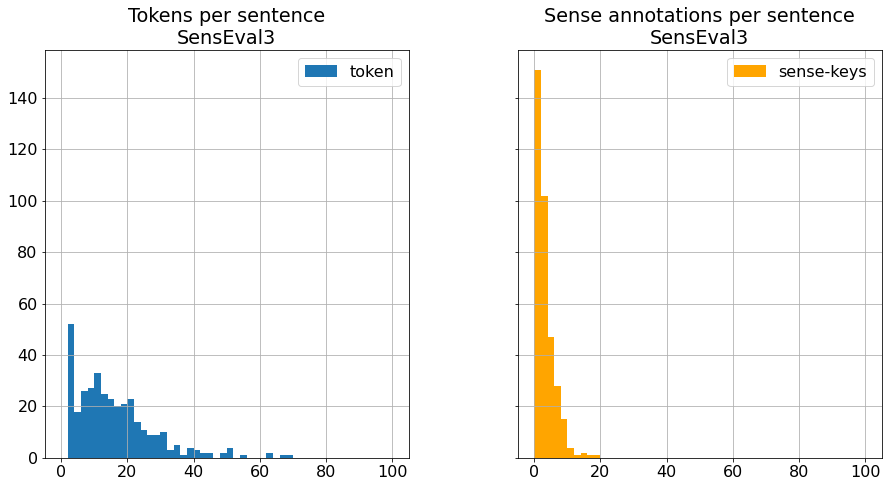

In [194]:
sentences_token_stat(sn3, "SensEval3")

### Token analysis


In [195]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/benji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [196]:
import string


def token_analysis(dataset, name):

    stop_words = set(nltk.corpus.stopwords.words("english"))
    stop_words.update(string.punctuation)
    stop_words.update(("``"))
    stop_words.update(("\""))
    
    lemmas_only = dataset.token_level["lemma"]
    lemmas_stop = lemmas_only[lemmas_only.isin(stop_words)].to_frame()
    lemmas_no_stop = lemmas_only[~lemmas_only.isin(stop_words)].to_frame()
    lemmas_with_sense = lemmas_only[
        dataset.token_level["sense-keys"].notnull()
    ].to_frame()

    n = 15

    figure1 = (
        dataset.token_level[["lemma"]]
        .apply(pd.value_counts)
        .sort_values(ascending=False, by="lemma")
        .head(n)
        .plot(kind="bar", figsize=(15, 7.5), title=f"Top {n} lemmas\n{name}")
        .get_figure()
    )
    figure2 = (
        lemmas_stop[["lemma"]]
        .apply(pd.value_counts)
        .sort_values(ascending=False, by="lemma")
        .head(n)
        .plot(kind="bar", figsize=(15, 7.5), title=f"Top {n} stop-word lemmas\n{name}")
        .get_figure()
    )
    figure3 = (
        lemmas_no_stop[["lemma"]]
        .apply(pd.value_counts)
        .sort_values(ascending=False, by="lemma")
        .head(n)
        .plot(kind="bar", figsize=(15, 7.5), title=f"Top {n} non stop-word lemmas\n{name}")
        .get_figure()
    )
    figure4 = (
        lemmas_with_sense[["lemma"]]
        .apply(pd.value_counts)
        .sort_values(ascending=False, by="lemma")
        .head(n)
        .plot(
            kind="bar",
            figsize=(15, 7.5),
            title=f"Top {n} lemmas with sense annotations\n{name}",
            color="orange",
        )
        .get_figure()
    )

    figures = (figure1, figure2, figure3, figure4)
    names = ("top-n-lemma", "top-n-stop-lemmas", "top-n-non-stop-lemmas", "top-n-annotated-lemmas")
    for figure, figure_name in zip(figures, names):
        op = stat_output_path(statname=figure_name, dataset_name=name)
        figure.savefig(op)

    lemma_groups = dataset.token_level.groupby("lemma")
    lemma_token_counts = lemma_groups.count()
    print(lemma_token_counts[["token"]].describe())



#### SemCor

              token
count  34968.000000
mean      22.947924
std      499.929942
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max    48752.000000


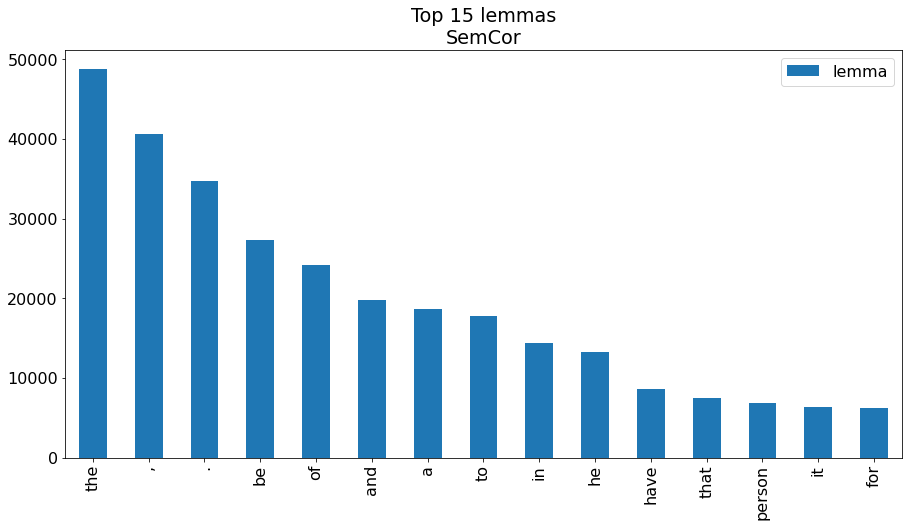

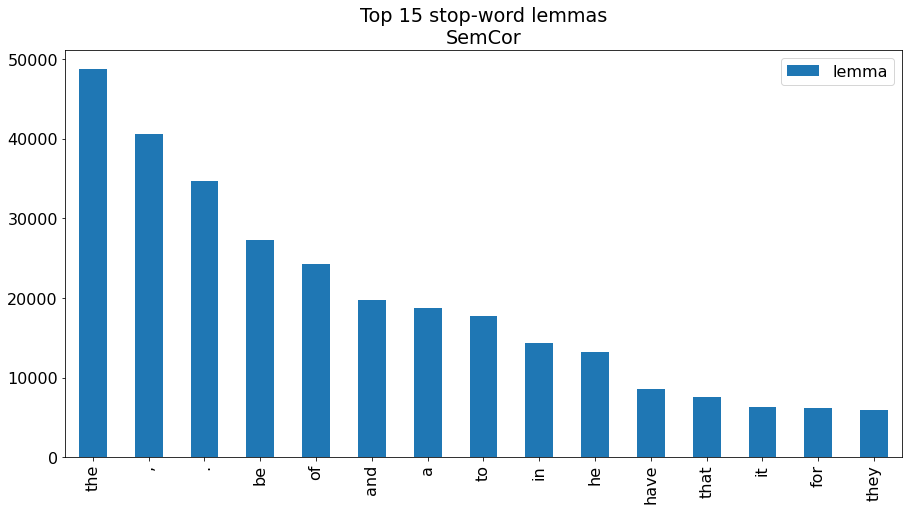

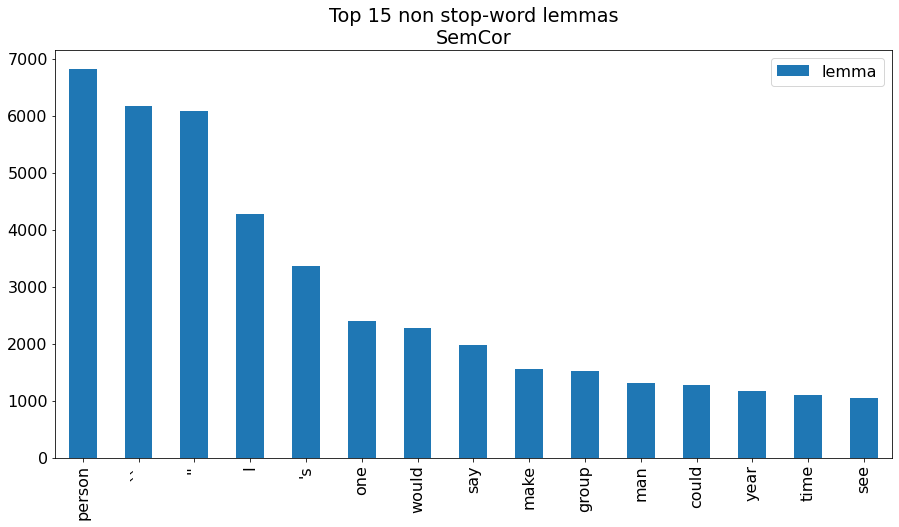

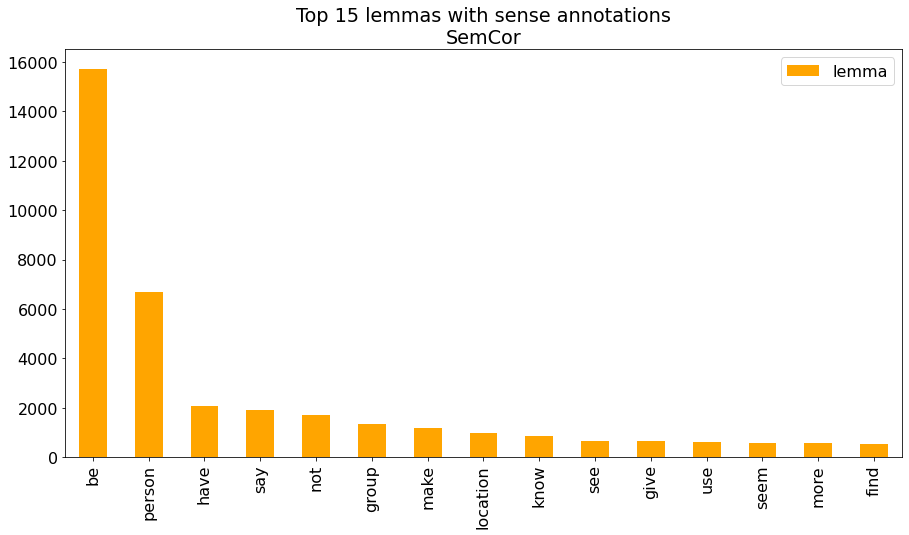

In [197]:
token_analysis(semcor, "SemCor")

             token
count  1146.000000
mean      2.793194
std      10.246737
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     181.000000


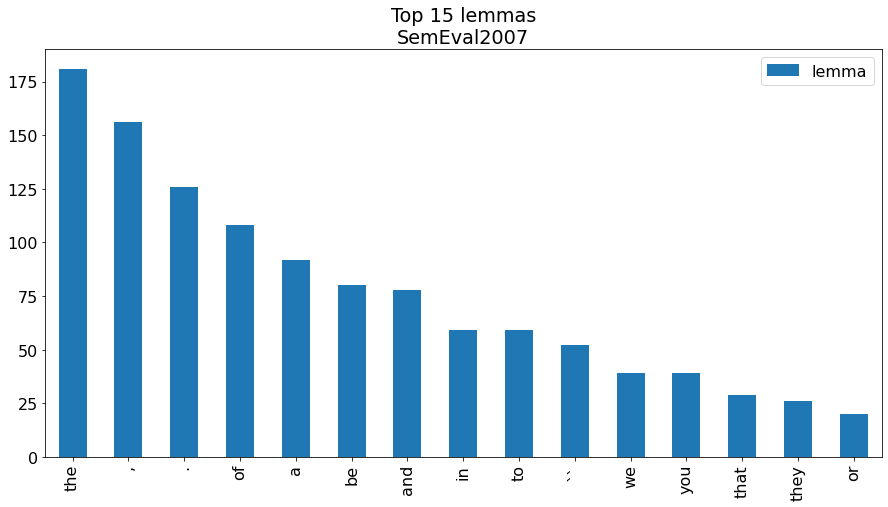

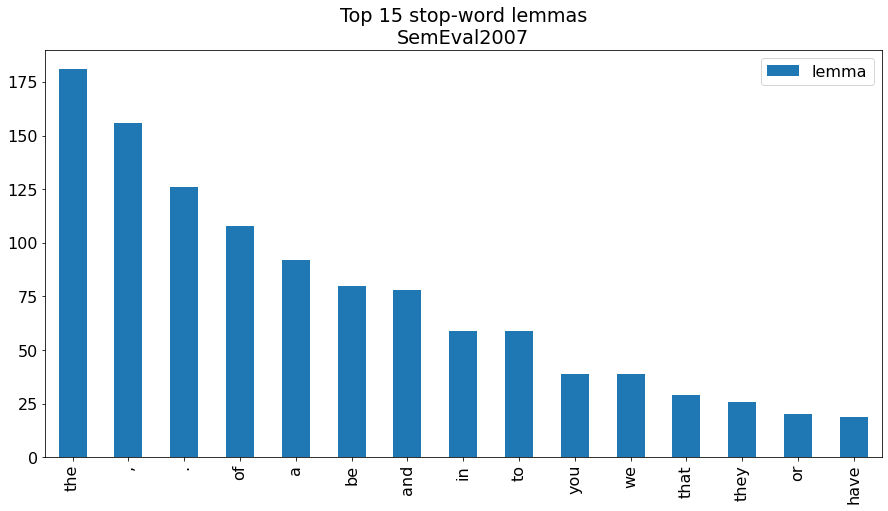

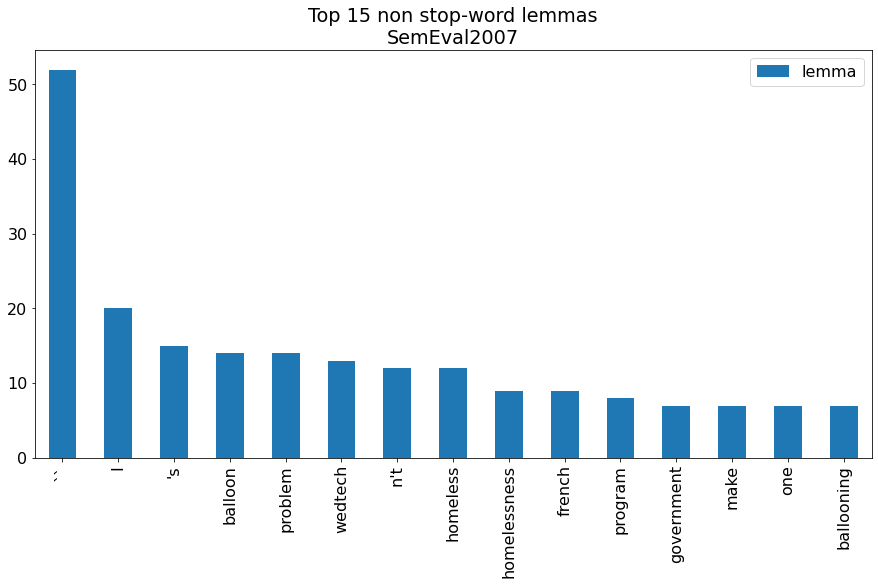

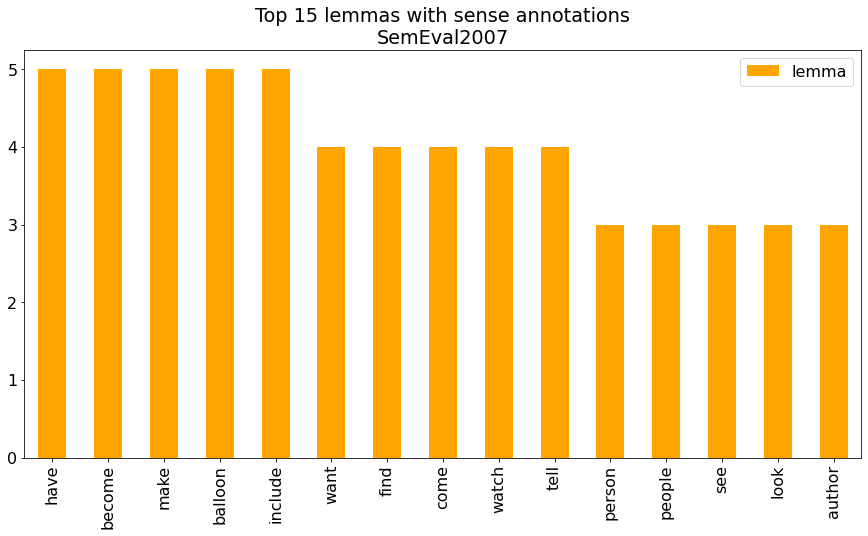

In [198]:
token_analysis(se2007, "SemEval2007")

             token
count  2080.000000
mean      4.034135
std      21.401907
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     619.000000


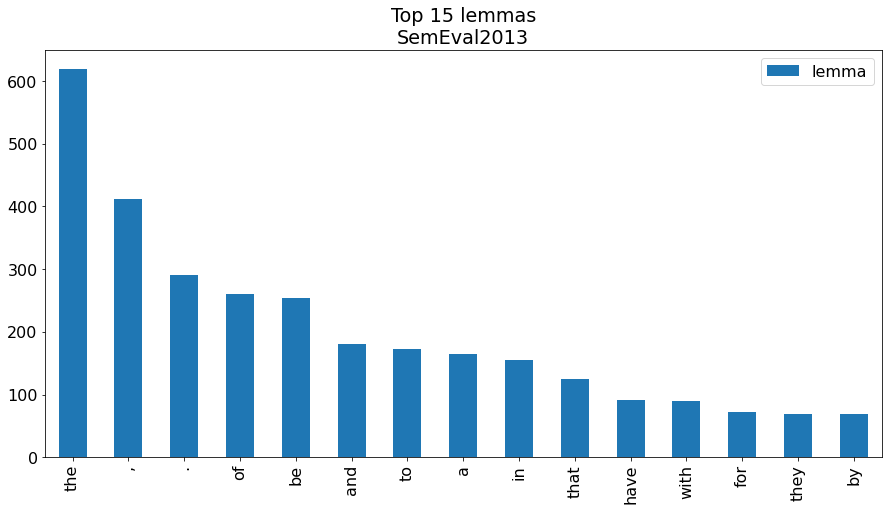

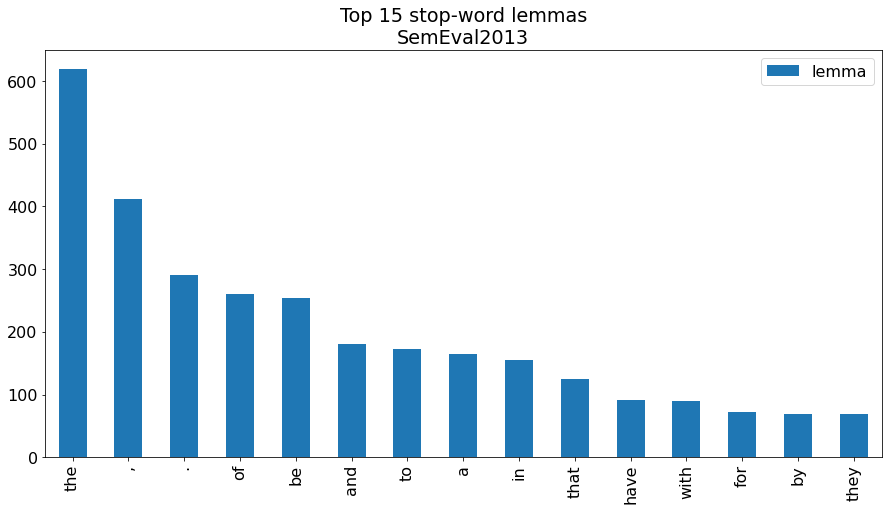

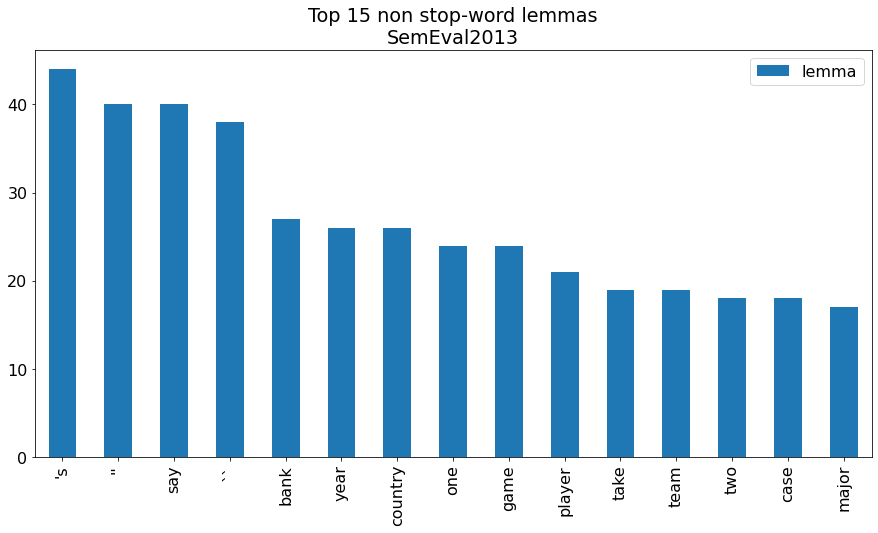

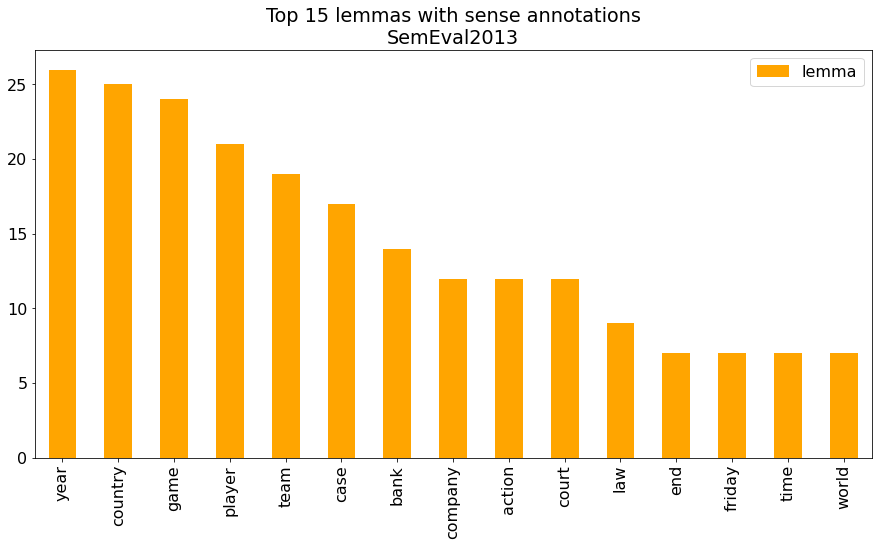

In [199]:
token_analysis(se2013, "SemEval2013")

            token
count  696.000000
mean     3.741379
std     11.028377
min      1.000000
25%      1.000000
50%      1.000000
75%      3.000000
max    158.000000


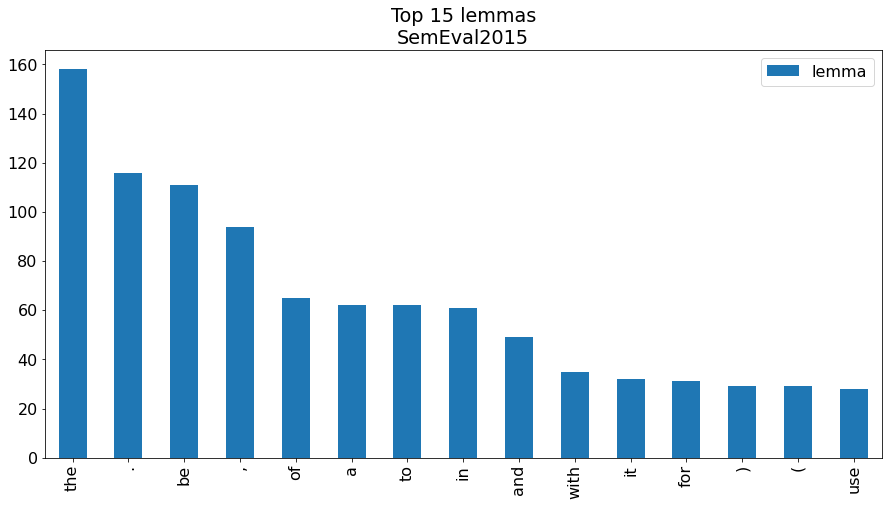

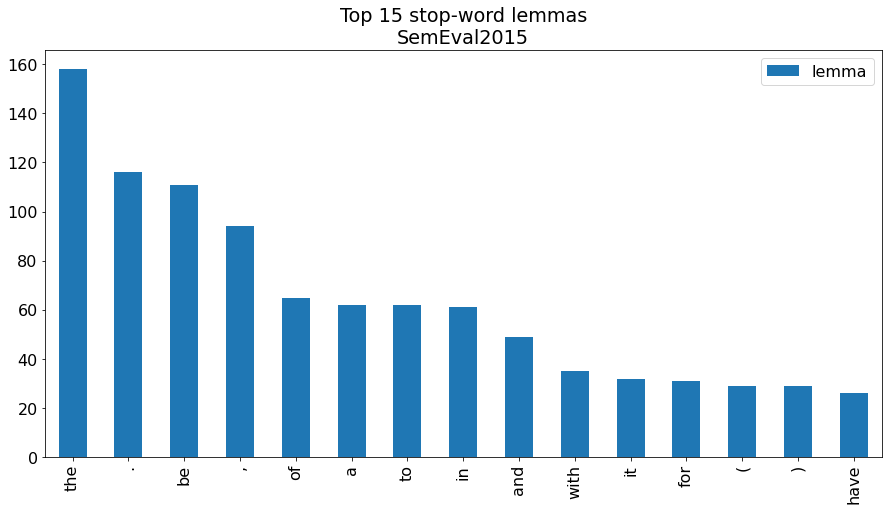

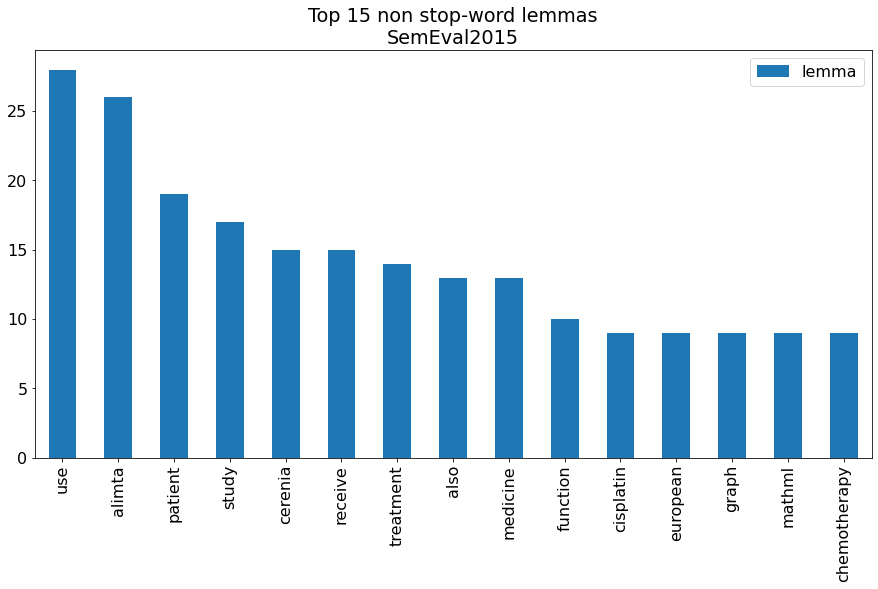

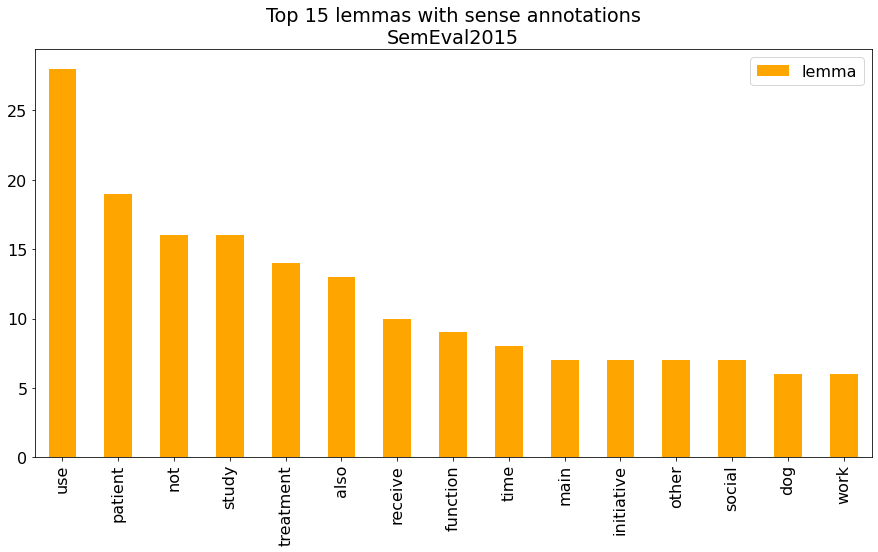

In [200]:
token_analysis(se2015, "SemEval2015")

             token
count  1426.000000
mean      4.043478
std      17.441940
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     333.000000


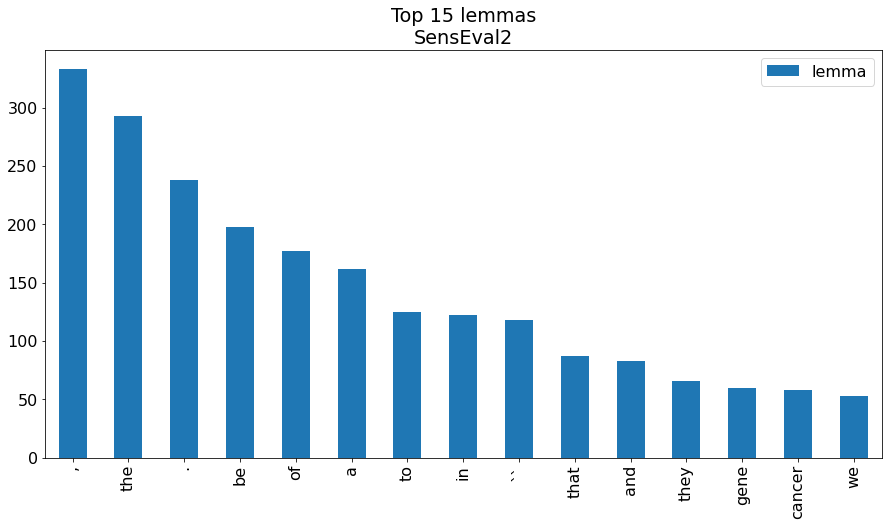

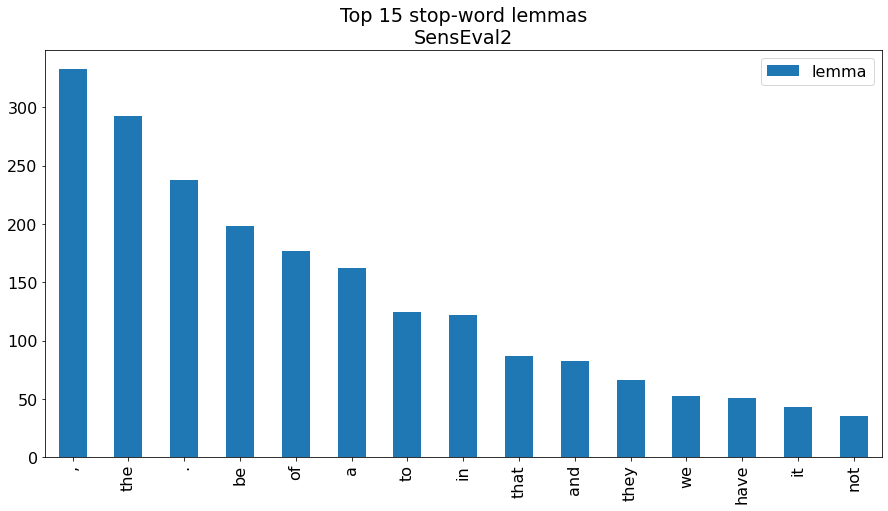

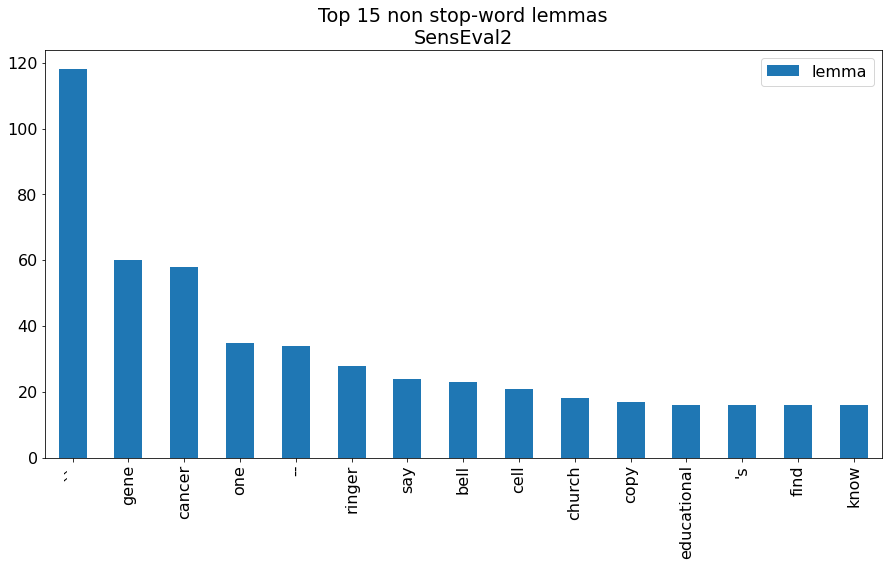

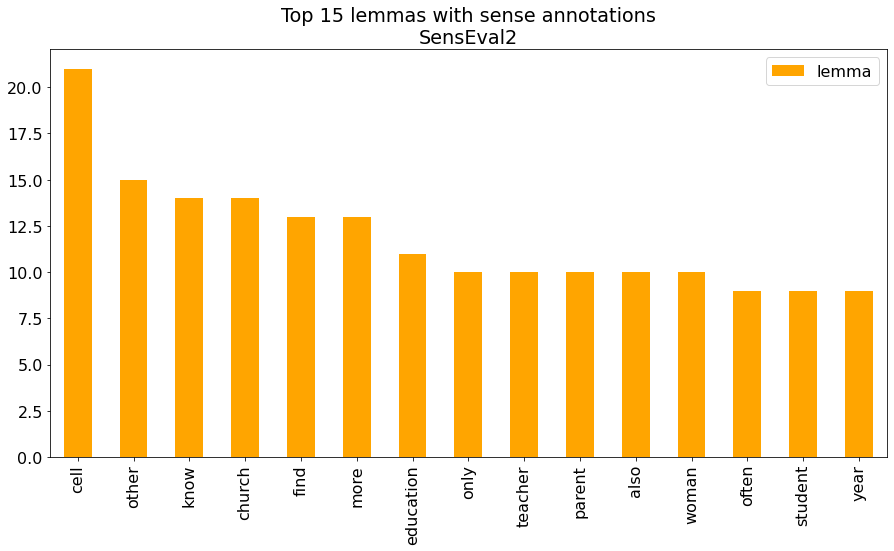

In [201]:
token_analysis(sn2, "SensEval2")

             token
count  1371.000000
mean      4.041575
std      16.777171
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     309.000000


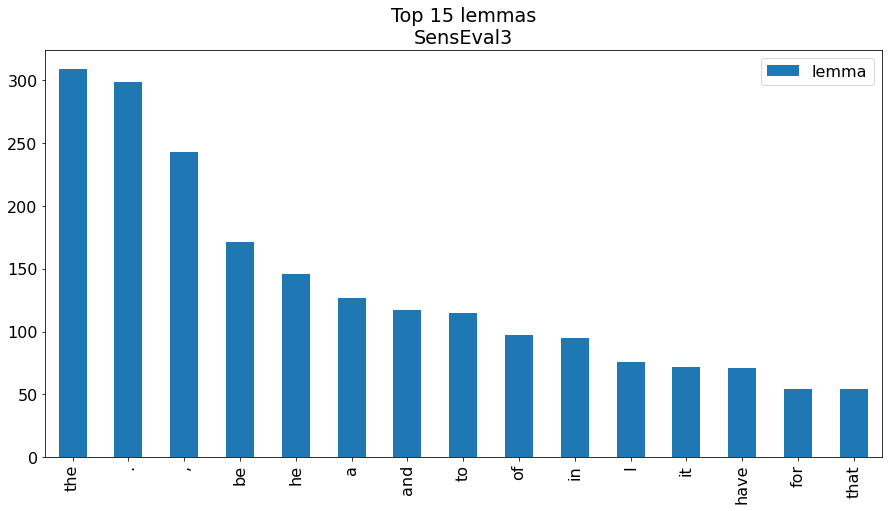

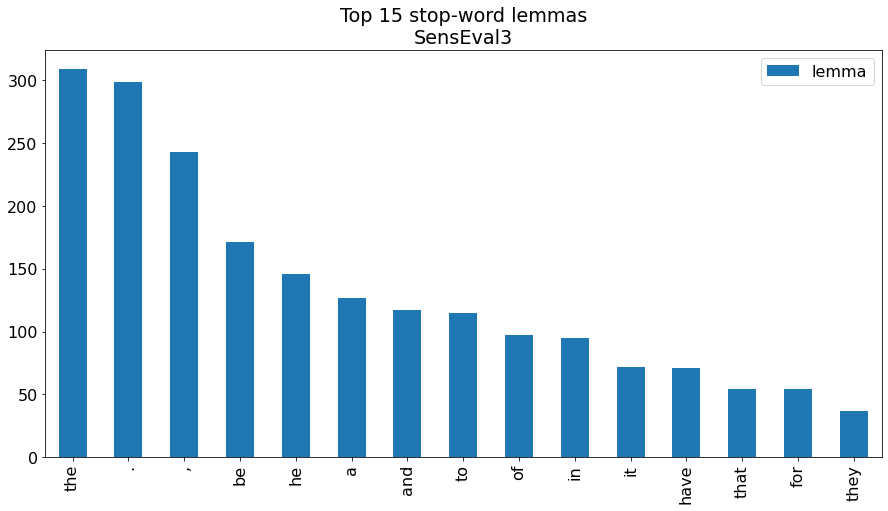

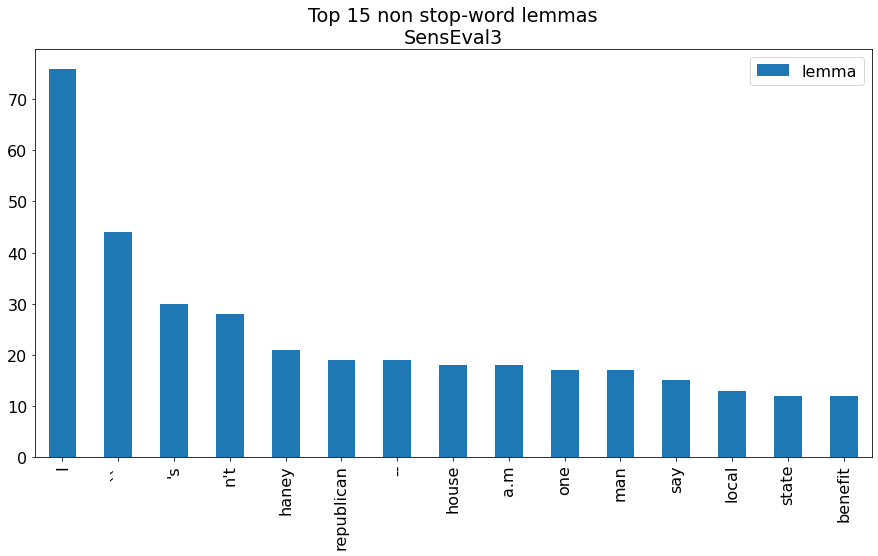

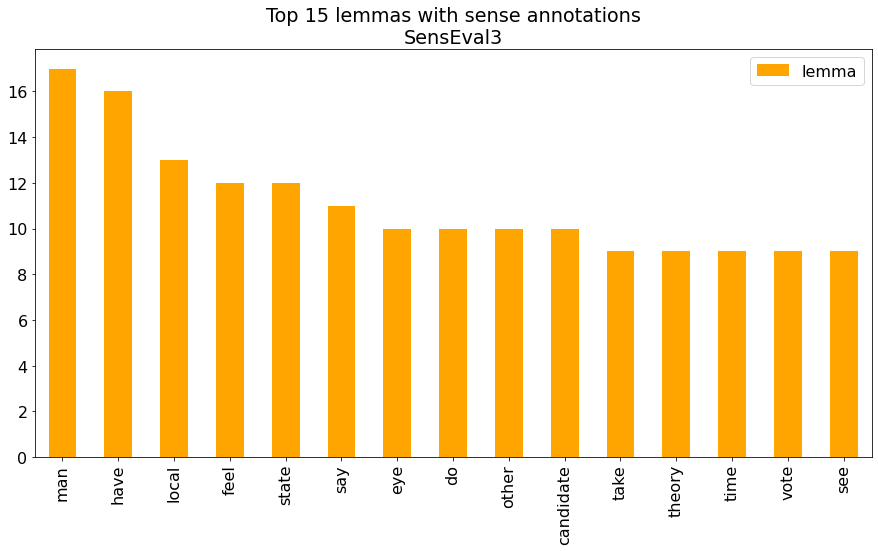

In [202]:
token_analysis(sn3, "SensEval3")

### Sense Analysis

In [203]:
def sense_analysis(dataset, name):
    print_alinged("Unique senses", dataset.token_level["sense-keys"].nunique())
    print_alinged("Sense Count", dataset.token_level["sense-keys"][dataset.token_level["sense-keys"].notna()].shape[0])
    n = 15
    figure = (
        dataset.token_level[["sense-keys"]]
        .apply(pd.value_counts)
        .sort_values(ascending=False, by="sense-keys")
        .head(n)
        .plot(
            kind="bar",
            figsize=(15, 7.5),
            title=f"Top {n} senses\n{name}",
            color="orange",
        )
        .get_figure()
    )

    op = stat_output_path(statname="sense_analysis", dataset_name=name)
    figure.savefig(op)


#### SemCor

Unique senses = 2584
Sense Count = 121220


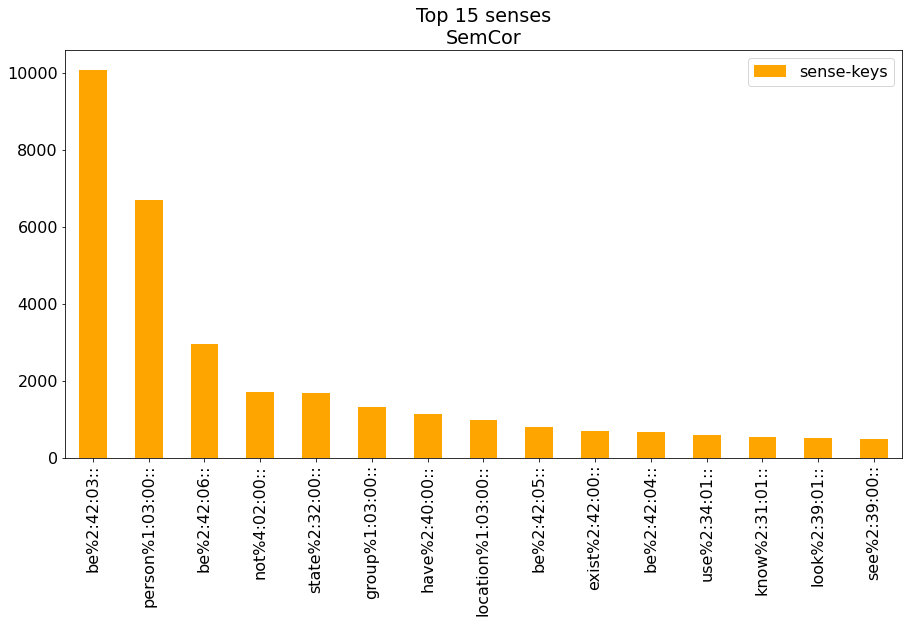

In [204]:
sense_analysis(semcor, "SemCor")

Unique senses = 198
Sense Count = 259


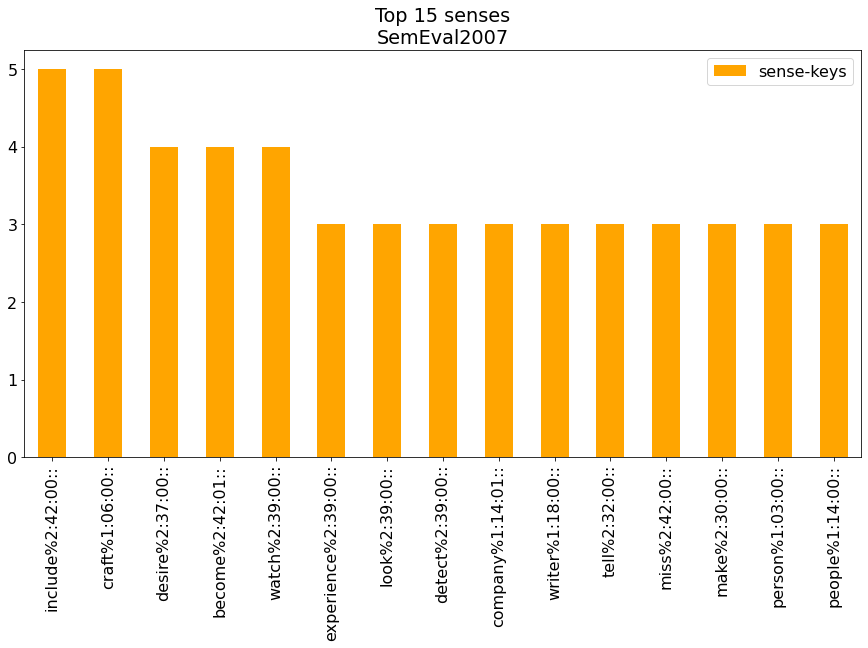

In [205]:
sense_analysis(se2007, "SemEval2007")

Unique senses = 267
Sense Count = 645


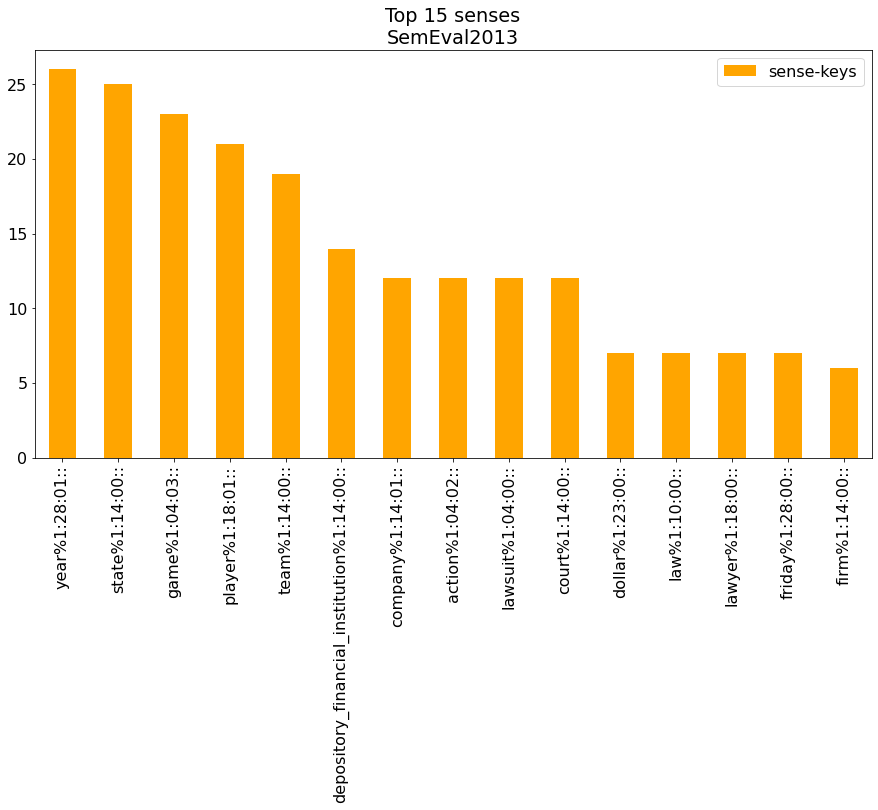

In [206]:
sense_analysis(se2013, "SemEval2013")

Unique senses = 245
Sense Count = 528


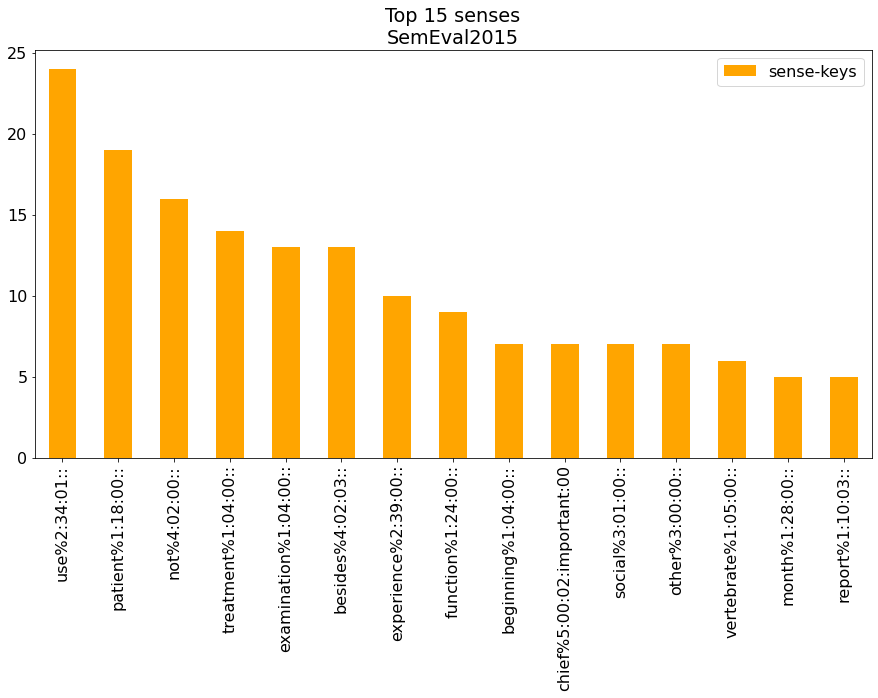

In [207]:
sense_analysis(se2015, "SemEval2015")

Unique senses = 563
Sense Count = 1069


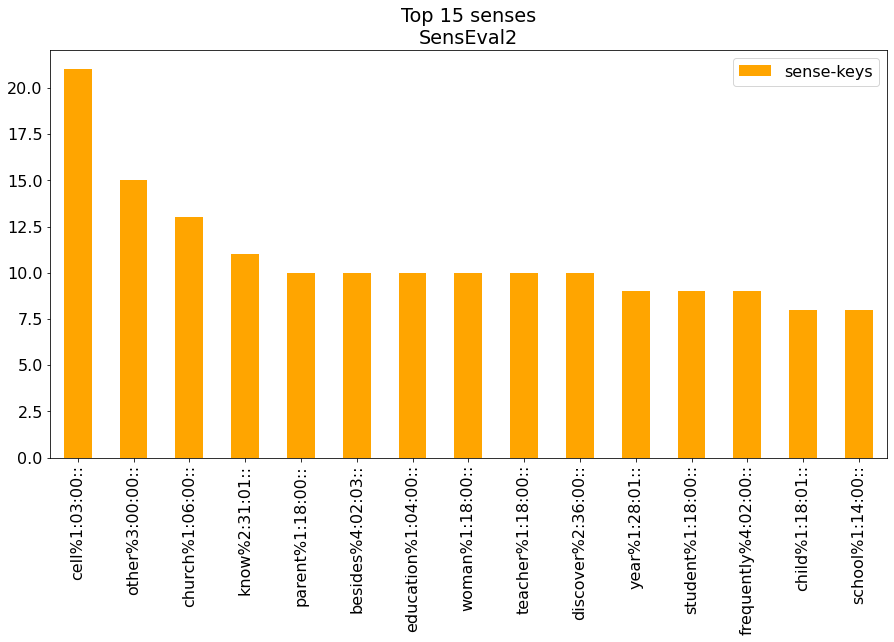

In [208]:
sense_analysis(sn2, "SensEval2")

Unique senses = 511
Sense Count = 948


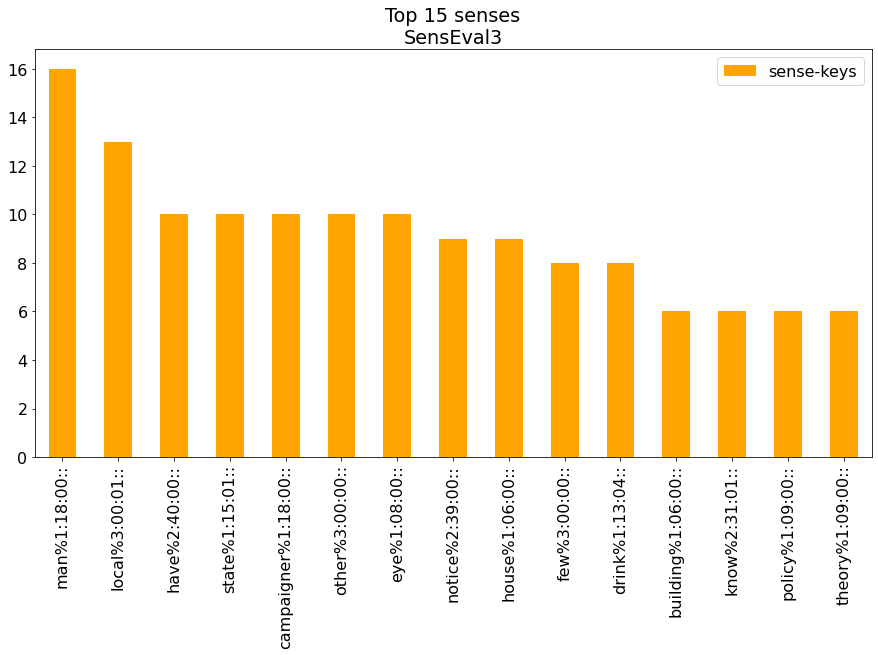

In [209]:
sense_analysis(sn3, "SensEval3")

### Sense/POS Analysis

In [210]:
import nltk.tag as tag
nltk.download('averaged_perceptron_tagger')

def sense_pos_analysis(dataset, name):
    sentences = dataset.sentences()

    all = dataset.token_level.copy()
    all['pos'] = ""

    for key, _ in sentences:
        sentence_frame = sentences.get_group(key)
        tagged_tokens = tag.pos_tag(sentence_frame['token'])
        for token_num, row_df in enumerate(sentence_frame.index.to_list()):
            _, pos = tagged_tokens[token_num]
            all.at[row_df, 'pos'] = pos
    
    with_sense = all[dataset.token_level['sense-keys'].notnull()]
    figure = with_sense[['pos']].apply(pd.value_counts).sort_values(ascending=False, by='pos').plot(kind="bar", figsize=(15, 7.5), title=f'Sense tokens per POS\n{name}', color='orange').get_figure()

    op = stat_output_path(dataset_name=name, statname="pos")
    figure.savefig(op)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/benji/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### SemCor

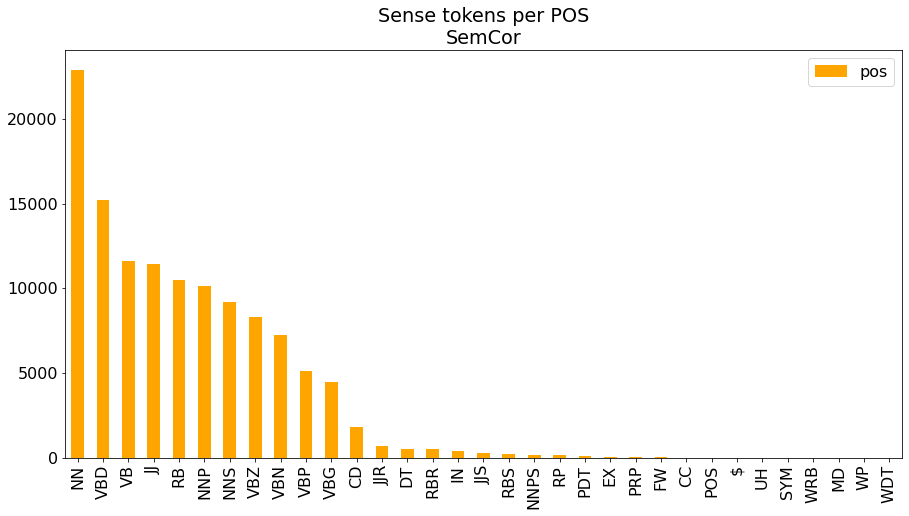

In [211]:
sense_pos_analysis(semcor, "SemCor")

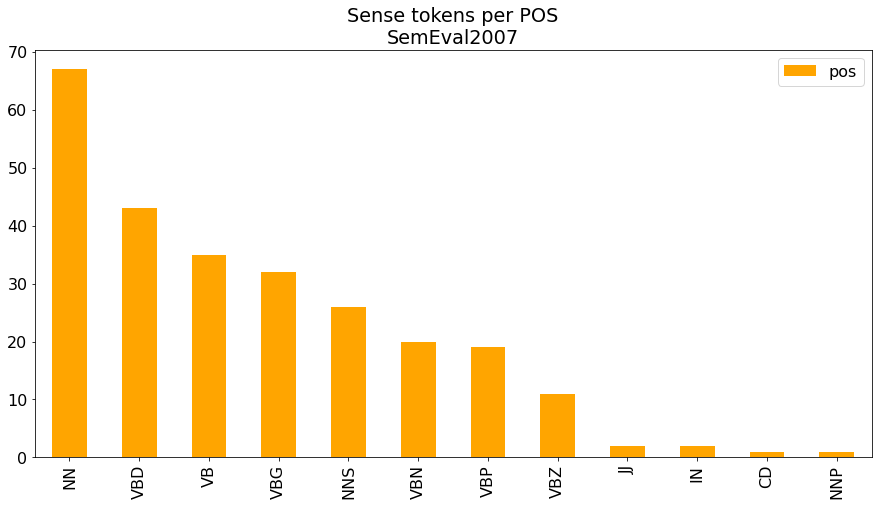

In [212]:
sense_pos_analysis(se2007, "SemEval2007")

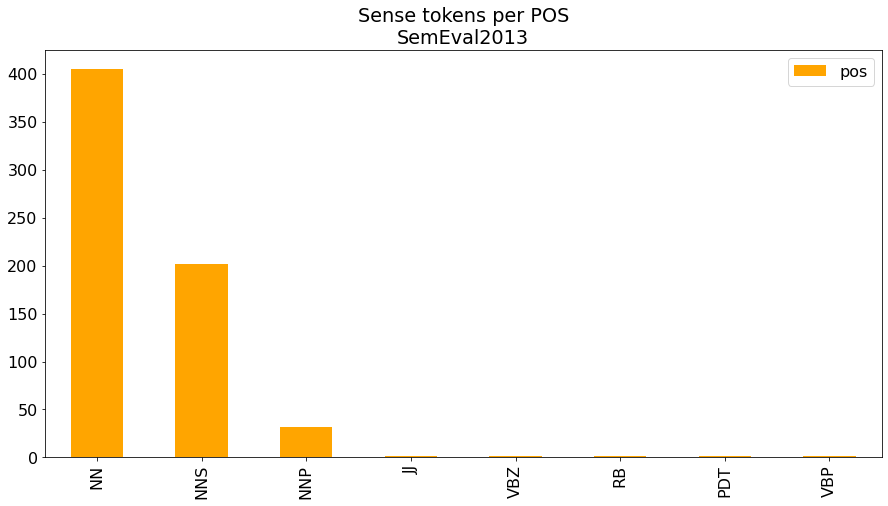

In [213]:
sense_pos_analysis(se2013, "SemEval2013")

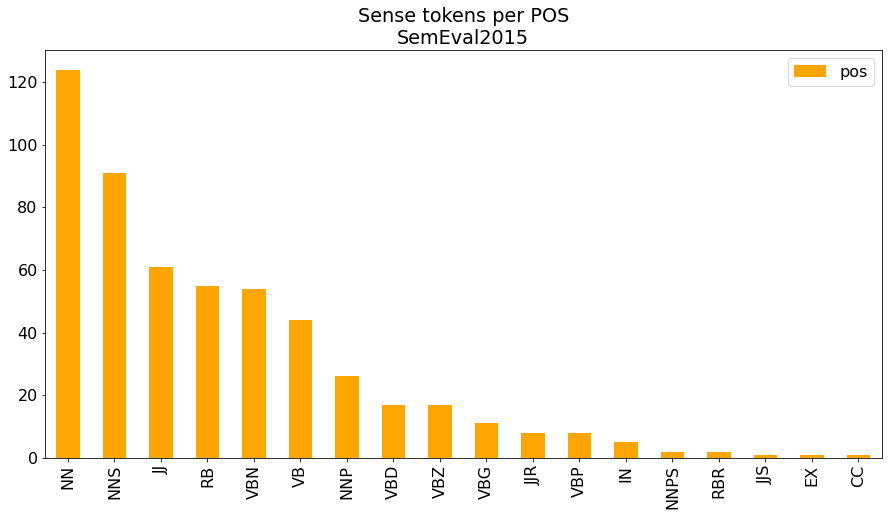

In [214]:
sense_pos_analysis(se2015, "SemEval2015")

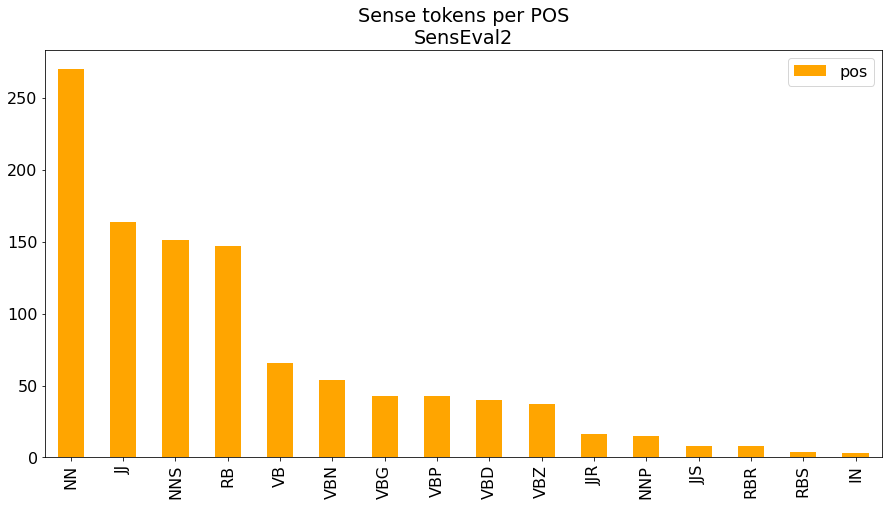

In [215]:
sense_pos_analysis(sn2, "SensEval2")

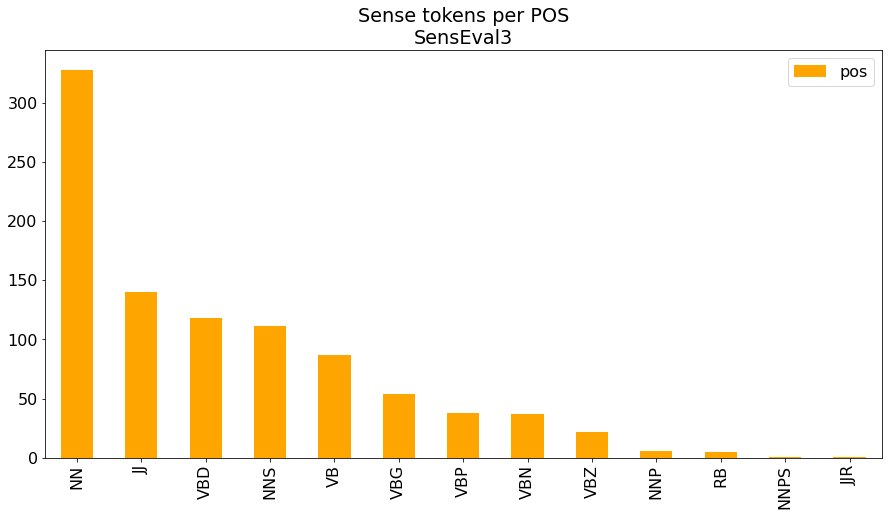

In [216]:
sense_pos_analysis(sn3, "SensEval3")